1. Read the parser.txt file containing the image id and the respective word for that image and take the first 10000 instances for training and testing of the model 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/NITAIML/words.zip" "/content/words.zip"
!cp "/content/drive/MyDrive/NITAIML/parser.txt" "/content/parser.txt"

In [3]:
with open("/content/parser.txt","r") as file:
  lines=file.readlines()
len(lines)  

115320

In [4]:
import pandas as pd
columns_list=[]
max_col_lens=[]
for line in lines:
  cols=line.split(" ")
  max_col_len=len(cols)
  columns_list.append(cols)
  max_col_lens.append(max_col_len)
data_file=pd.DataFrame({"lines":columns_list,"max_col_len":max_col_lens})
data_file.head(3)

,lines,max_col_len
0,"[a01-000u-00-00, ok, 154, 408, 768, 27, 51, AT...",9
1,"[a01-000u-00-01, ok, 154, 507, 766, 213, 48, N...",9
2,"[a01-000u-00-02, ok, 154, 796, 764, 70, 50, TO...",9


In [5]:
data_file=data_file.loc[data_file.max_col_len==9,"lines"]
data_file.head(3)

0    [a01-000u-00-00, ok, 154, 408, 768, 27, 51, AT...
1    [a01-000u-00-01, ok, 154, 507, 766, 213, 48, N...
2    [a01-000u-00-02, ok, 154, 796, 764, 70, 50, TO...
Name: lines, dtype: object

In [6]:
def get_data_file_cols(data_cols):
  c1,c2,c9=[],[],[]
  for i in data_cols:
    c1.append(i[0])
    c2.append(i[1])
    c9.append(i[8].replace("\n",""))
  dt=pd.DataFrame({"id":c1,"status":c2,"text":c9})
  return dt
df=get_data_file_cols(data_file)
df.head(1000).tail(5)

,id,status,text
995,a01-020-04-04,ok,the
996,a01-020-04-05,ok,Africans
997,a01-020-04-06,ok,the
998,a01-020-04-07,ok,overall
999,a01-020-05-00,ok,majority


In [7]:
df.shape

(115284, 3)

In [8]:
df=df.loc[df.status=="ok",:]

In [9]:
df.shape

(96430, 3)

In [10]:
df.head(19045).tail(5)

,id,status,text
21408,b06-049-07-03,ok,with
21409,b06-049-07-04,ok,the
21410,b06-049-07-05,ok,Tories
21411,b06-049-07-06,ok,.
21412,b06-049-07-07,ok,Many


2. Images can be of different shape thus resize all your images to have the same shape (for example = (128,32))

3. Currently, the pixel values are between 0 to 255, normalize the images so that the pixel 
values are in range 0 to 1

In [11]:
import os
from matplotlib import image
def getFileDF(path,files,file_names):
    for i in os.listdir(path):
        file_path=os.path.join(path,i)
        if os.path.isdir(file_path):
            getFileDF(file_path,files,file_names)
        
        else:
            
            dir_path=file_path.split("/")[:-1]
            file_name=file_path.split("/")[-1]
            file_name=file_name.split(".")[0]
            dir_path="/".join(dir_path)
            file_ext=file_path.split(".")[-1]
            files.append(file_path)
            file_names.append(file_name)
            #image_size.append(image.imread(file_path))
    return files,file_names

In [16]:
import shutil
shutil.rmtree("/content/words")
!unzip -q words.zip
files,file_names=getFileDF("/content/words",[],[])

warning [words.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [words.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #116936).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


In [17]:
import pandas as pd
image_df=pd.DataFrame({"files":files,"file_names":file_names})
image_df.head(2)

,files,file_names
0,/content/words/a02/a02-042/a02-042-06-02.png,a02-042-06-02
1,/content/words/a02/a02-042/a02-042-05-01.png,a02-042-05-01


In [18]:
image_df.shape

(115320, 2)

In [19]:
text_df=pd.DataFrame({"file_names":df["id"],"text":df["text"]})
text_df.head(2)

,file_names,text
0,a01-000u-00-00,A
1,a01-000u-00-01,MOVE


In [20]:
text_df.shape

(96430, 2)

In [21]:
data=pd.merge(text_df,image_df,on="file_names",how="left")
data.head(2)

,file_names,text,files
0,a01-000u-00-00,A,/content/words/a01/a01-000u/a01-000u-00-00.png
1,a01-000u-00-01,MOVE,/content/words/a01/a01-000u/a01-000u-00-01.png


In [22]:
data.shape

(96430, 3)

In [23]:
X=data.loc[:9999,["files","text"]].copy()
print("X Shape: ",X.shape)

X Shape:  (10000, 2)


In [24]:
X=X.reset_index()
X.head(2)

,index,files,text
0,0,/content/words/a01/a01-000u/a01-000u-00-00.png,A
1,1,/content/words/a01/a01-000u/a01-000u-00-01.png,MOVE


In [25]:
X.drop(["index"],axis=1,inplace=True)

In [26]:
X.head(7010).tail(5)
X=X.loc[:,:]

(6, 5)


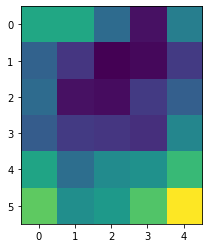

In [30]:
import matplotlib.image as image
import numpy as np
import matplotlib.pyplot as plt
import cv2
img=image.imread("/content/words/b01/b01-049/b01-049-01-07.png",format="RGB")
print(img.shape)
plt.imshow(img)

(32, 128)
(128, 32)


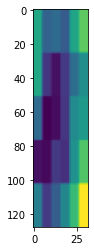

In [31]:
img=cv2.resize(img,(128,32),interpolation=cv2.INTER_AREA)
print(img.shape)
#img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img=np.transpose(img)
plt.imshow(img)
print(img.shape)

In [32]:
image.imsave("/content/images_test.png",img)

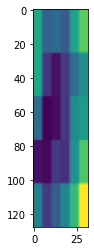

In [33]:
img=image.imread("/content/images_test.png")
plt.imshow(img)

In [34]:
def transform(image):
    image=cv2.resize(image,(128,32),interpolation=cv2.INTER_AREA)
    #image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    image=np.transpose(image)
    return image

In [36]:
new_files=[]
import shutil
#shutil.rmtree("/kaggle/working/new_words")
for i in X.files:
  try:
    img=image.imread(i)
    img=transform(img)
    new_file=i.split("/")[-1]
    if os.path.isdir("/content/new_words"):
        pass
    else:
        os.mkdir("/content/new_words")
    new_path="/content/new_words/"+new_file
    new_files.append(new_path)
    image.imsave(new_path,img)
  except:
    print(i)

/content/words/a01/a01-117/a01-117-05-02.png


In [ ]:
#X.loc[X.files=="/content/words/r06/r06-022/r06-022-03-05.png",:]  

In [37]:
X.loc[X.files=="/content/words/a01/a01-117/a01-117-05-02.png",:]  

,files,text
3588,/content/words/a01/a01-117/a01-117-05-02.png,Powell


In [38]:
X.drop([3588],axis=0,inplace=True)

In [39]:
X.shape

(9999, 2)

In [40]:
print(new_files[0],X.files.head(1)) 

/content/new_words/a01-000u-00-00.png 0    /content/words/a01/a01-000u/a01-000u-00-00.png
Name: files, dtype: object


In [41]:
X=X.reset_index()
X.head(2)

,index,files,text
0,0,/content/words/a01/a01-000u/a01-000u-00-00.png,A
1,1,/content/words/a01/a01-000u/a01-000u-00-01.png,MOVE


In [42]:
X.drop(["index"],axis=1,inplace=True)
print(X.shape)
X.head(3)

(9999, 2)


,files,text
0,/content/words/a01/a01-000u/a01-000u-00-00.png,A
1,/content/words/a01/a01-000u/a01-000u-00-01.png,MOVE
2,/content/words/a01/a01-000u/a01-000u-00-02.png,to


In [43]:
X=pd.concat([X,pd.Series(new_files)],axis=1)
X.head(3)

,files,text,0
0,/content/words/a01/a01-000u/a01-000u-00-00.png,A,/content/new_words/a01-000u-00-00.png
1,/content/words/a01/a01-000u/a01-000u-00-01.png,MOVE,/content/new_words/a01-000u-00-01.png
2,/content/words/a01/a01-000u/a01-000u-00-02.png,to,/content/new_words/a01-000u-00-02.png


In [44]:
X.columns=["files","text","new_files"]
X.drop(["files"],axis=1,inplace=True)
X.head(3)

,text,new_files
0,A,/content/new_words/a01-000u-00-00.png
1,MOVE,/content/new_words/a01-000u-00-01.png
2,to,/content/new_words/a01-000u-00-02.png


0.98039216


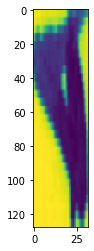

In [45]:
img=image.imread("/content/new_words/a01-000u-00-00.png")
print(img[0,0,0])
plt.imshow(img)
plt.show()

In [46]:
X.head(2)

,text,new_files
0,A,/content/new_words/a01-000u-00-00.png
1,MOVE,/content/new_words/a01-000u-00-01.png


In [47]:
X.tail(5)

,text,new_files
9994,debate,/content/new_words/a05-053-08-00.png
9995,",",/content/new_words/a05-053-08-01.png
9996,said,/content/new_words/a05-053-08-02.png
9997,the,/content/new_words/a05-053-08-03.png
9998,Government,/content/new_words/a05-053-08-04.png


4. Create a list of all characters and use the character’s index to encode the actual words into digits


In [48]:
char_list="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789 ,;.!?:'\"/\|_@#&*+-=()"
char_tokens=[char for char in char_list]
def get_token_text(text,char_token):
  tokens=[token for token in text]
  token_ids=[char_tokens.index(token) for token in tokens]
  token_text=",".join([str(tkn) for tkn in token_ids])
  max_len=len(token_ids)
  return token_text,max_len

In [49]:
token_list=[]
max_lens=[]
for i in X.text:
  token_text,max_len=get_token_text(i,char_tokens)
  token_list.append(token_text)
  max_lens.append(max_len)
tokenization_data=pd.DataFrame({"tokens":token_list,"max_len":max_lens})
tokenization_data.head(3)

,tokens,max_len
0,0,1
1,"12,14,21,4",4
2,"45,40",2


In [50]:
X.text.head(3)

0       A
1    MOVE
2      to
Name: text, dtype: object

In [51]:
X.text.tail(4)

9995             ,
9996          said
9997           the
9998    Government
Name: text, dtype: object

In [52]:
tokenization_data.tail(4)

,tokens,max_len
9995,63,1
9996,"44,26,34,29",4
9997,"45,33,30",3
9998,"6,40,47,30,43,39,38,30,39,45",10


In [53]:
max_length=tokenization_data.max_len.max()

In [54]:
max_length

16

In [55]:
X.loc[tokenization_data.max_len==16,"text"]

1495    unconstitutional
2558    once-and-for-all
2624    once-and-for-all
Name: text, dtype: object

In [56]:
X.loc[[1495,2558,2624],:]

,text,new_files
1495,unconstitutional,/content/new_words/a01-038-10-01.png
2558,once-and-for-all,/content/new_words/a01-072u-02-03.png
2624,once-and-for-all,/content/new_words/a01-072x-02-00.png


5. Pad all the words to have a similar length

In [57]:
def get_padded_data(token_list,max_len):
  tokens=token_list.split(",")
  len_tokens=len(tokens)
  padding=[99 for i in range(max_len-len_tokens)]
  tokens.extend(padding)
  token_text=",".join([str(token) for token in tokens])
  return token_text

In [58]:
tokens_padded=[get_padded_data(token,max_length+1) for token in tokenization_data.tokens]
tokenization_data=pd.concat([tokenization_data,pd.Series(tokens_padded),X.text],axis=1)
tokenization_data.head(1004).tail(5)

,tokens,max_len,0,text
999,"26,43,30",3,"26,43,30,99,99,99,99,99,99,99,99,99,99,99,99,9...",are
1000,"44,30,30,36,34,39,32",7,"44,30,30,36,34,39,32,99,99,99,99,99,99,99,99,9...",seeking
1001,65,1,"65,99,99,99,99,99,99,99,99,99,99,99,99,99,99,9...",.
1002,"0,31,43,34,28,26,39",7,"0,31,43,34,28,26,39,99,99,99,99,99,99,99,99,99,99",African
1003,"29,30,37,30,32,26,45,30,44",9,"29,30,37,30,32,26,45,30,44,99,99,99,99,99,99,9...",delegates


In [59]:
tokenization_data.columns=["tokens","max_len","padded_tokens","text"]
tokenization_data.head(4)

,tokens,max_len,padded_tokens,text
0,0,1,"0,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99",A
1,"12,14,21,4",4,"12,14,21,4,99,99,99,99,99,99,99,99,99,99,99,99,99",MOVE
2,"45,40",2,"45,40,99,99,99,99,99,99,99,99,99,99,99,99,99,9...",to
3,"44,45,40,41",4,"44,45,40,41,99,99,99,99,99,99,99,99,99,99,99,9...",stop


In [60]:
tokenization_data.loc[0,"padded_tokens"]

'0,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99'

6. Split your dataset for training and testing 

In [61]:
from sklearn.model_selection import train_test_split
x_values=X.new_files[:]
y_values=tokenization_data.loc[:,["max_len","padded_tokens","text"]]

x_train,x_test,y_train,y_test=train_test_split(x_values,y_values,test_size=0.20,random_state=100)
x_test,x_final_test,y_test,y_final_test=train_test_split(x_test,y_test,test_size=0.50,random_state=100)
print(" Train shapes X",x_train.shape, " Y: ",y_train.shape)
print(" Test shapes X",x_test.shape, " Y : ",y_test.shape)
print(" Test shapes X",x_final_test.shape, " Y : ",y_final_test.shape)

 Train shapes X (7999,)  Y:  (7999, 3)
 Test shapes X (1000,)  Y :  (1000, 3)
 Test shapes X (1000,)  Y :  (1000, 3)


In [62]:
import numpy as np
import cv2
def get_images_matrix(files):
  arr=[]
  for i,file in enumerate(files):
    img=image.imread(file,format="RGB")
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img=img/255
    if i==0:
      print(img.shape)
      arr.append(np.reshape(img,(32,128,1)))
    else:
      if i%5000==0:
        print(i," files processed..")
      arr.append(np.reshape(img,(32,128,1)))
  return arr
x_test_arr=get_images_matrix(x_test)

(128, 32)


In [63]:
del x_test

In [64]:
print(len(x_test_arr))
print(x_test_arr[0][0,0,0])

1000
0.5254901960784314


In [65]:
x_train_arr=get_images_matrix(x_train)    

(128, 32)
5000  files processed..


In [66]:
del x_train

In [67]:
x_final_test_arr=get_images_matrix(x_final_test)

(128, 32)


In [68]:
del x_final_test

In [69]:
print(len(x_train_arr))         
print(x_train_arr[0][0,0,0])       

7999
0.8431372549019608


In [70]:
y_train.head(3)   

,max_len,padded_tokens,text
9387,3,"26,39,29,99,99,99,99,99,99,99,99,99,99,99,99,9...",and
7538,3,"31,40,43,99,99,99,99,99,99,99,99,99,99,99,99,9...",for
6949,10,"4,47,30,43,50,45,33,34,39,32,99,99,99,99,99,99,99",Everything


In [71]:
y_test.head(3)

,max_len,padded_tokens,text
6615,3,"45,48,40,99,99,99,99,99,99,99,99,99,99,99,99,9...",two
4704,3,"33,34,38,99,99,99,99,99,99,99,99,99,99,99,99,9...",him
9843,12,"13,26,45,34,40,39,26,37,34,44,45,44,99,99,99,9...",Nationalists


In [72]:
y_train=y_train.reset_index()
y_train.drop(["index"],axis=1,inplace=True)
y_test=y_test.reset_index()
y_test.drop(["index"],axis=1,inplace=True)
y_final_test=y_final_test.reset_index()
y_final_test.drop(["index"],axis=1,inplace=True)

In [73]:
y_train.head(3)

,max_len,padded_tokens,text
0,3,"26,39,29,99,99,99,99,99,99,99,99,99,99,99,99,9...",and
1,3,"31,40,43,99,99,99,99,99,99,99,99,99,99,99,99,9...",for
2,10,"4,47,30,43,50,45,33,34,39,32,99,99,99,99,99,99,99",Everything


In [74]:
len(x_train_arr)

7999

7. Create a model for training: Marks: 30 

a) Add several CNN layers to extract the sequence of features

b) Add Bi-LSTM layers to propagate through the sequence

c) Add a dense layer (output layer) with total number of neurons as (total number of characters + 1) and the activation as softmax.


In [77]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [78]:
from tensorflow.keras.layers import Dense, Flatten,Input,Conv2D,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.layers import LSTM,Bidirectional,Lambda,Flatten
from tensorflow.keras.models import Model
from tensorflow_addons.layers import GroupNormalization

In [79]:
import tensorflow as tf
from tensorflow.keras import backend as k
input_layer=Input(shape=(32,128,1))
layer=Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu")(input_layer)
layer=MaxPool2D(pool_size=(2,2),padding="same")(layer)
layer=GroupNormalization(4)(layer)
layer=Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu")(layer)
layer=MaxPool2D(pool_size=(2,2),padding="same")(layer)
layer=GroupNormalization(4)(layer)
layer=tf.keras.layers.Reshape(target_shape=((32, 256)))(layer)
layer=Dense(32,activation="relu")(layer)
layer=Dropout(0.4)(layer)
layer=Bidirectional(LSTM(100,return_sequences=True,dropout=0.5))(layer)
layer=GroupNormalization(5)(layer)
output_layer=Dense(len(char_tokens)+1,activation='softmax')(layer)

In [80]:
len(char_tokens)

84

8. The output sequence from the output layer will be fed to the CTC layer. 

In [81]:
labels = Input(name='label', shape=(max_length+1), dtype='float32')
input_length = Input(name='input_length', shape=(1), dtype='int64')
label_length = Input(name='label_length', shape=(1), dtype='int64')


def ctc_lambda_func(args):
  y_pred, labels, label_length,input_length = args
  return k.ctc_batch_cost(labels, y_pred, input_length, label_length)
loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([output_layer, labels, label_length,input_length])

In [82]:
model = Model(inputs=[input_layer, labels, label_length,input_length], outputs=loss)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 128, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 32, 128, 32)  320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 64, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 group_normalization (GroupNorm  (None, 16, 64, 32)  64          ['max_pooling2d[0][0]']      

In [83]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer ="adam")

labels_train=np.zeros((y_train.shape[0],max_length+1))
labels_test=np.zeros((y_test.shape[0],max_length+1))
for i,_ in enumerate(y_train.padded_tokens):
    temp=np.array( y_train.padded_tokens[i].split(","))
    labels_train[i, :] =temp
    

for i ,_ in enumerate(y_test.padded_tokens):
    temp=np.array( y_test.padded_tokens[i].split(","))
    labels_test[i, :] =temp

In [84]:
print(labels_train.shape)
print(labels_train[0])
print(y_train.padded_tokens[0])

(7999, 17)
[26. 39. 29. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.]
26,39,29,99,99,99,99,99,99,99,99,99,99,99,99,99,99


In [85]:
class TextImageGenerator:
    
    def __init__(self, images,text_padded,
                 img_w,
                 img_h, 
                 batch_size, 
                 i_len,
                 max_text_len
                 ):
        self.img_h = img_h
        self.img_w = img_w
        self.batch_size = batch_size
        self.max_text_len = max_text_len
        #self.samples = data
        self.images=images
        self.text_padded=text_padded
        self.n = len(self.text_padded)
        self.i_len = i_len
        self.indexes = list(range(self.n))
        self.cur_index = 0
        
    def build_data(self):
        self.imgs = np.zeros((self.n, self.img_h, self.img_w,1))
        self.texts = []
        for i,  (text, img) in enumerate(zip(self.text_padded,self.images)):
            self.imgs[i, :, :,:] = img
            self.texts.append(text)
    
    def next_sample(self):
        self.cur_index += 1
        if self.cur_index >= self.n:
            self.cur_index = 0
            np.random.shuffle(self.indexes)
        return self.imgs[self.indexes[self.cur_index]], self.texts[self.indexes[self.cur_index]]
    
    def next_batch(self):
        while True:

            # width and height are backwards from typical Keras convention
            # because width is the time dimension when it gets fed into the RNN
            X_data = np.zeros([self.batch_size, self.img_h, self.img_w, 1])
            Y_data = np.zeros([self.batch_size, self.max_text_len])
            input_length_i = np.ones((self.batch_size, 1)) * self.i_len
            label_length_i = np.ones((self.batch_size, 1)) * self.max_text_len
                                  
            for i in range(self.batch_size):
                img, text = self.next_sample()
                X_data[i] = img
                Y_data[i, :] = text
            inputs = [X_data, Y_data, input_length_i, label_length_i]
            outputs = np.zeros([self.batch_size])
            yield (inputs, outputs)

In [86]:
batch_size = 32
input_length = len(char_tokens)+1
img_w = 128
img_h = 32
train_data = TextImageGenerator(x_train_arr,labels_train, img_w, img_h, batch_size, input_length, max_length+1)
train_data.build_data()

In [87]:
max_length

16

In [88]:
y_train[:9]

,max_len,padded_tokens,text
0,3,"26,39,29,99,99,99,99,99,99,99,99,99,99,99,99,9...",and
1,3,"31,40,43,99,99,99,99,99,99,99,99,99,99,99,99,9...",for
2,10,"4,47,30,43,50,45,33,34,39,32,99,99,99,99,99,99,99",Everything
3,7,"18,30,39,26,45,40,43,99,99,99,99,99,99,99,99,9...",Senator
4,3,"45,33,30,99,99,99,99,99,99,99,99,99,99,99,99,9...",the
5,9,"31,34,39,26,39,28,34,39,32,99,99,99,99,99,99,9...",financing
6,3,"18,34,43,99,99,99,99,99,99,99,99,99,99,99,99,9...",Sir
7,1,"65,99,99,99,99,99,99,99,99,99,99,99,99,99,99,9...",.
8,1,"80,99,99,99,99,99,99,99,99,99,99,99,99,99,99,9...",-


In [89]:
labels_train[8]

array([80., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99.,
       99., 99., 99., 99.])

In [90]:
train_data.n

7999

In [91]:
val_data = TextImageGenerator(x_test_arr,labels_test, img_w, img_h, batch_size, input_length, max_length+1)
val_data.build_data()

In [92]:
y_train.padded_tokens[0]

'26,39,29,99,99,99,99,99,99,99,99,99,99,99,99,99,99'

In [93]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='min')
history=model.fit(train_data.next_batch(),epochs=100,steps_per_epoch=train_data.n/batch_size,
                  validation_data=val_data.next_batch(),
                  validation_steps=val_data.n/batch_size, callbacks=[earlystop])        

Epoch 1/100
249/249 [==============================] - 42s 101ms/step - loss: 16.5280 - val_loss: 15.5578
Epoch 2/100
249/249 [==============================] - 18s 71ms/step - loss: 14.7548 - val_loss: 14.4796
Epoch 3/100
249/249 [==============================] - 18s 71ms/step - loss: 14.0016 - val_loss: 13.7748
Epoch 4/100
249/249 [==============================] - 17s 70ms/step - loss: 13.3103 - val_loss: 12.7242
Epoch 5/100
249/249 [==============================] - 20s 80ms/step - loss: 12.6906 - val_loss: 12.3868
Epoch 6/100
249/249 [==============================] - 18s 72ms/step - loss: 12.2519 - val_loss: 12.3436
Epoch 7/100
249/249 [==============================] - 18s 71ms/step - loss: 11.7377 - val_loss: 11.3116
Epoch 8/100
249/249 [==============================] - 18s 71ms/step - loss: 11.4223 - val_loss: 11.1774
Epoch 9/100
249/249 [==============================] - 18s 72ms/step - loss: 11.0820 - val_loss: 10.9919
Epoch 10/100
249/249 [==============================] 

In [94]:
model.save("/content/model1.h5",overwrite=True,include_optimizer=True) 

In [95]:
test_arr=x_final_test_arr

In [96]:
test_arr=np.array(test_arr)

In [97]:
test_arr.shape

(1000, 32, 128, 1)

In [98]:
model2=Model(inputs=[input_layer],outputs=[output_layer])
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 128, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 32, 128, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 64, 32)       0         
 )                                                               
                                                                 
 group_normalization (GroupN  (None, 16, 64, 32)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 32, 32)        0   

In [99]:
test_arr.shape

(1000, 32, 128, 1)

In [101]:
model2.load_weights("/content/model1.h5")

In [104]:
prediction=model2.predict(x=test_arr,verbose=1)

32/32 [==============================] - 2s 17ms/step


In [105]:
prediction.shape

(1000, 32, 85)

In [106]:
# use CTC decoder
decoded = k.ctc_decode(prediction,input_length=np.ones(prediction.shape[0]) * prediction.shape[1],greedy=True)[0][0]
output = k.get_value(decoded) 


In [107]:
print(output.shape)
print(output[0])

(1000, 32)
[29 45 12 45 65 30 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [108]:
y_final_test.head(2)

,max_len,padded_tokens,text
0,4,"29,30,26,37,99,99,99,99,99,99,99,99,99,99,99,9...",deal
1,1,"65,99,99,99,99,99,99,99,99,99,99,99,99,99,99,9...",.


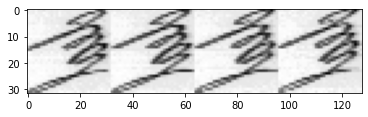

original text =  'deal' predicted text = 'dtMt.e' 

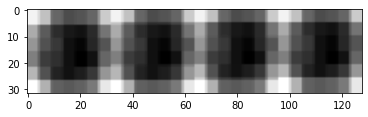

original text =  '.' predicted text = '.o' 

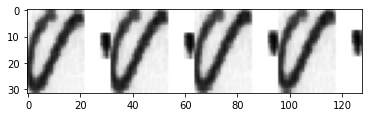

original text =  '?' predicted text = ':fy' 

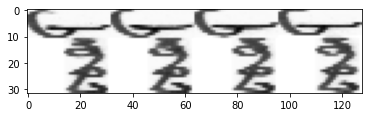

original text =  'Press' predicted text = 'Poewsol' 

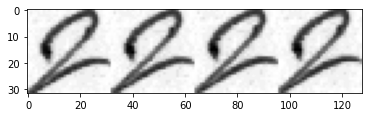

original text =  'a' predicted text = 'arf.P' 

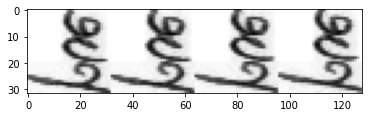

original text =  'and' predicted text = 'pode' 

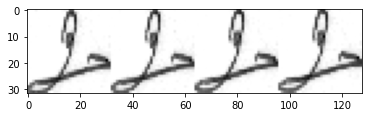

original text =  'of' predicted text = 'of' 

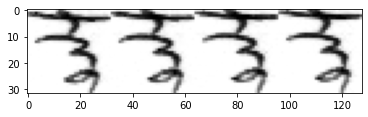

original text =  'the' predicted text = 'the.6o' 

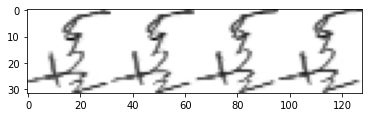

original text =  'party' predicted text = 'prtys' 

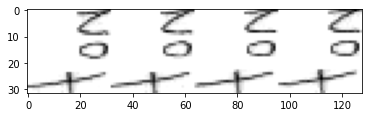

original text =  'not' predicted text = 'notfe' 

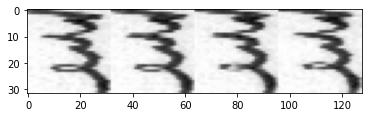

original text =  'the' predicted text = 'the:3' 

In [109]:
word_more=0
for i, word in enumerate(output):
    plt.imshow(test_arr[i,:,:,:].reshape(32,128), cmap=plt.cm.gray)
    plt.show()
    text= y_final_test.padded_tokens[i].split(",")
    print("original text =  '",end="")
    for letter in text:
        if (int(letter) != 99) :
            print(char_tokens[int(letter)], end = '')
    print("' ",end="")
    print("predicted text = '", end = '')
    for letter in word:
        if (int(letter) != 99) & (int(letter) != -1):
            print(char_tokens[int(letter)], end = '')
        else:
          break
    print("' ",end="")
    if word_more==10:
      break
    else:
      word_more+=1

END OF PROJECT